In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [14]:
data = pd.read_csv('House Price India.csv')


In [25]:
data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [27]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [28]:
data.tail()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14615,6762830250,42734,2,1.5,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.0,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.0,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.0,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14619,6762831463,42734,3,1.0,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [31]:
data.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [34]:
data.duplicated().sum()

0

In [15]:
X = data[['living area', 'number of bedrooms', 'number of bathrooms', 'number of floors']]
y = data['Price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 65978857634.009445
R-squared: 0.5317957061192108


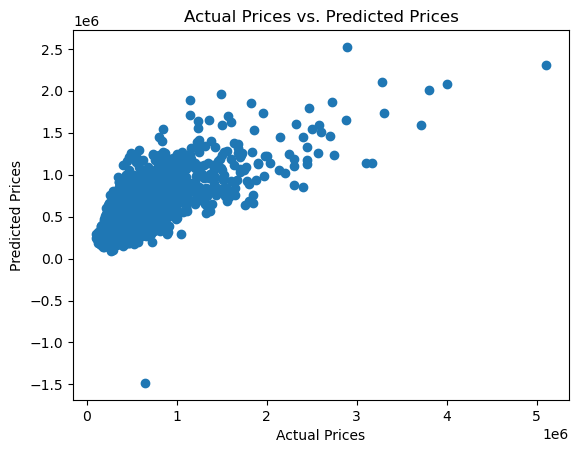

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()